In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("./heart_2022_with_nans.csv/heart_2022_with_nans.csv")
df.columns
#We want to predict if a patient had a heart attack
#df.HadHeartAttack.isna().sum()
#Let's drop the rows with na values because they wont help our model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [24]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [25]:
numerical_cols = df.select_dtypes(include="number").drop(columns="BMI")
numerical_cols = df.loc[:,numerical_cols.columns]
#all of these have missing values so we can do the following 
#we calculate the average (assumes that these columsn are gaussian distributed in population) of columns 0-4 and input them
#we can calculate bmi with weifht/(height)^2


In [26]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy="mean", missing_values=np.nan)
imputer.fit(numerical_cols)
numerical_cols[numerical_cols.columns] = imputer.transform(numerical_cols)
numerical_cols.isna().sum()
numerical_cols.describe()
df[numerical_cols.columns] = numerical_cols
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.702691,83.07447,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.600000,68.04000,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.570000,63.50000,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.650000,63.50000,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.570000,53.98000,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.650000,69.85000,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.700000,83.01000,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.700000,49.90000,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.830000,108.86000,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [27]:
height = df.HeightInMeters
weight = df.WeightInKilograms
df["BMI"] = weight/(height)**2
df.BMI.describe()

count    445132.000000
mean         28.590569
std           6.356631
min           6.768013
25%          24.381140
50%          28.036353
75%          31.410145
max         235.527110
Name: BMI, dtype: float64

In [28]:
df = df.loc[(df["BMI"] > 16) & (df["BMI"] < 40), :]
df.BMI.describe()

count    421029.000000
mean         27.704097
std           4.774270
min          16.008763
25%          24.247385
50%          27.591670
75%          30.698147
max          39.994083
Name: BMI, dtype: float64

Numerical data is proccesed and based on the overview of describe() the data does make sense except that the outliers of max 24 hours slept and 2.41 meters in height however that could be due to super rare conditions and such people exist in society. However we need limit the BMI to between 16-40. Everything other than that is not humanly possible

In [29]:
#Getting binary target variable so model can use it as input
df["HadHeartAttack"]=df.HadHeartAttack.map({"Yes": 1, "No": 0})
df.dropna(subset=["HadHeartAttack"], inplace=True)
df.HadHeartAttack.isna().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\1279044066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HadHeartAttack"]=df.HadHeartAttack.map({"Yes": 1, "No": 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\1279044066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["HadHeartAttack"], inplace=True)


np.int64(0)

In [30]:
string_cols = df.select_dtypes(include="object")
type(string_cols)

pandas.core.frame.DataFrame

We can see that alot of the columns are binary so lets break them out and map them to either 0 or 1  

In [31]:

binary_filtered_str = string_cols.loc[:, string_cols.nunique() == 2]
for col in binary_filtered_str:
    if len(np.sort(binary_filtered_str[col].astype(str).unique())) == 3:
        value_1 = np.sort(binary_filtered_str[col].astype(str).unique())[1] #Yes, male
        value_2 = np.sort(binary_filtered_str[col].astype(str).unique())[0] #No, female 
        value_3 = np.sort(binary_filtered_str[col].astype(str).unique())[2] #'nan'
        value_dict = {value_1: 1, value_2: 0, value_3: np.nan}
        binary_filtered_str[col] = binary_filtered_str[col].map(value_dict)

    if len(np.sort(binary_filtered_str[col].astype(str).unique())) == 2:
        value_1 = np.sort(binary_filtered_str[col].astype(str).unique())[1] #Yes
        value_2 = np.sort(binary_filtered_str[col].astype(str).unique())[0] #No
        value_dict = {value_1: 1, value_2: 0}
        binary_filtered_str[col] = binary_filtered_str[col].map(value_dict)




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\1709151980.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_filtered_str[col] = binary_filtered_str[col].map(value_dict)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\1709151980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_filtered_str[col] = binary_filtered_str[col].map(value_dict)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\1709151980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [32]:
binary_filtered_str.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418162 entries, 0 to 445131
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        418162 non-null  int64  
 1   PhysicalActivities         417240 non-null  float64
 2   HadAngina                  414859 non-null  float64
 3   HadStroke                  417168 non-null  float64
 4   HadAsthma                  416830 non-null  float64
 5   HadSkinCancer              415542 non-null  float64
 6   HadCOPD                    416459 non-null  float64
 7   HadDepressiveDisorder      415888 non-null  float64
 8   HadKidneyDisease           416674 non-null  float64
 9   HadArthritis               415978 non-null  float64
 10  DeafOrHardOfHearing        398113 non-null  float64
 11  BlindOrVisionDifficulty    397251 non-null  float64
 12  DifficultyConcentrating    394791 non-null  float64
 13  DifficultyWalking          394943 

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

for cols in binary_filtered_str:
    binary_filtered_str[[cols]] = imputer.fit_transform(binary_filtered_str[[cols]])

binary_filtered_str.info()
df[binary_filtered_str.columns] = binary_filtered_str
df.info()
df.columns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\2865536620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_filtered_str[[cols]] = imputer.fit_transform(binary_filtered_str[[cols]])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\2865536620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_filtered_str[[cols]] = imputer.fit_transform(binary_filtered_str[[cols]])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\2865536620.py:5: SettingWithCopyWarning: 
A value is trying to be set o

<class 'pandas.core.frame.DataFrame'>
Index: 418162 entries, 0 to 445131
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        418162 non-null  int64  
 1   PhysicalActivities         418162 non-null  float64
 2   HadAngina                  418162 non-null  float64
 3   HadStroke                  418162 non-null  float64
 4   HadAsthma                  418162 non-null  float64
 5   HadSkinCancer              418162 non-null  float64
 6   HadCOPD                    418162 non-null  float64
 7   HadDepressiveDisorder      418162 non-null  float64
 8   HadKidneyDisease           418162 non-null  float64
 9   HadArthritis               418162 non-null  float64
 10  DeafOrHardOfHearing        418162 non-null  float64
 11  BlindOrVisionDifficulty    418162 non-null  float64
 12  DifficultyConcentrating    418162 non-null  float64
 13  DifficultyWalking          418162 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\2865536620.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_filtered_str.columns] = binary_filtered_str


<class 'pandas.core.frame.DataFrame'>
Index: 418162 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      418162 non-null  object 
 1   Sex                        418162 non-null  int64  
 2   GeneralHealth              417126 non-null  object 
 3   PhysicalHealthDays         418162 non-null  float64
 4   MentalHealthDays           418162 non-null  float64
 5   LastCheckupTime            410492 non-null  object 
 6   PhysicalActivities         418162 non-null  float64
 7   SleepHours                 418162 non-null  float64
 8   RemovedTeeth               407748 non-null  object 
 9   HadHeartAttack             418162 non-null  float64
 10  HadAngina                  418162 non-null  float64
 11  HadStroke                  418162 non-null  float64
 12  HadAsthma                  418162 non-null  float64
 13  HadSkinCancer              418162 

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [34]:
one_hot_encoder = string_cols.loc[:, string_cols.nunique() > 2]
one_hot_encoder.head()
one_hot_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418162 entries, 0 to 445131
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   State                  418162 non-null  object
 1   GeneralHealth          417126 non-null  object
 2   LastCheckupTime        410492 non-null  object
 3   RemovedTeeth           407748 non-null  object
 4   HadDiabetes            417431 non-null  object
 5   SmokerStatus           384070 non-null  object
 6   ECigaretteUsage        383873 non-null  object
 7   RaceEthnicityCategory  405041 non-null  object
 8   AgeCategory            409569 non-null  object
 9   TetanusLast10Tdap      339907 non-null  object
 10  CovidPos               369616 non-null  object
dtypes: object(11)
memory usage: 38.3+ MB


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

for cols in one_hot_encoder:
    one_hot_encoder[[cols]] = imputer.fit_transform(one_hot_encoder[[cols]])

one_hot_encoder

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\2772893608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_encoder[[cols]] = imputer.fit_transform(one_hot_encoder[[cols]])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\2772893608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_encoder[[cols]] = imputer.fit_transform(one_hot_encoder[[cols]])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14480\2772893608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,State,GeneralHealth,LastCheckupTime,RemovedTeeth,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,TetanusLast10Tdap,CovidPos
0,Alabama,Very good,Within past year (anytime less than 12 months ...,None of them,Yes,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,"Yes, received tetanus shot but not sure what type",No
1,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa...",No
2,Alabama,Very good,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,"No, did not receive any tetanus shot in the pa...",Yes
3,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,"No, did not receive any tetanus shot in the pa...",No
4,Alabama,Fair,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,"No, did not receive any tetanus shot in the pa...",No
...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Good,Within past 2 years (1 year but less than 2 ye...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,"No, did not receive any tetanus shot in the pa...",Yes
445128,Virgin Islands,Excellent,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,"Yes, received tetanus shot but not sure what type",No
445129,Virgin Islands,Poor,5 or more years ago,1 to 5,No,Current smoker - now smokes every day,Use them some days,"White only, Non-Hispanic",Age 65 to 69,"No, did not receive any tetanus shot in the pa...",No
445130,Virgin Islands,Very good,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,"No, did not receive any tetanus shot in the pa...",Yes


In [36]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [37]:
df = pd.get_dummies(df, columns=one_hot_encoder.columns,drop_first=False)

The data is now cleaned and we can go to modelling 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import f1_score

X = df.drop(columns="HadHeartAttack")
y = df.HadHeartAttack
X.describe()
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=1)

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
y_pred =  model.predict(X_val)
error = root_mean_squared_error(y_val,y_pred)
print(error)

0.2295791662701385
0.3462268628381585


c:\Users\Lenovo\heart_disease_predictor\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We have a 22.3% error, however our dataset is unbalanced and this doesnt paint a full picture. Lets use F1 score and a confusion matrix. No scaler have been applied either

In [65]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


f1_log = f1_score(y_true=y_val, y_pred=y_pred)
print(f1_log)

cm = confusion_matrix(y_val, y_pred)
print(cm)


0.3462268628381585
[[97572  1144]
 [ 4366  1459]]


The model doesnt have alot of training data on true positivs which is why its performing so badly. The true positivs are tanking the f1 score. Scaling the data will probably help but only marginally. Lets try another model like XGboost 

In [66]:
from xgboost import XGBClassifier

# Compute class imbalance ratio
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos
scale_pos_weight = 228000 / 5800

model = XGBClassifier(random_state=1, scale_pos_weight=scale,eval_metric='logloss',use_label_encoder=False)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_xgb = f1_score(y_val,y_pred)
print(f1_xgb)
print(confusion_matrix(y_val, y_pred))


c:\Users\Lenovo\heart_disease_predictor\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:37:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.33868715083798884
[[83130 15586]
 [ 1460  4365]]


from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight':[1,5,10,15,20,25,30]
}

grid = GridSearchCV(
    XGBClassifier(scale_pos_weight=scale, random_state=1, eval_metric='logloss'),
    param_grid=params,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print(grid.best_params_)


In [67]:
model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    scale_pos_weight=5,
    random_state=1,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_xgb = f1_score(y_val,y_pred)
print(f1_xgb)
print(confusion_matrix(y_val, y_pred))


c:\Users\Lenovo\heart_disease_predictor\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:37:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.4724157258387381
[[95002  3714]
 [ 2875  2950]]


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators": [100,150,200],   
    "max_depth": [2,4,6,10,15,20],
    "min_samples_split":[2,4,6,10,50],
    "min_weight_fraction_leaf": [0.0,0.2,0.5,0.8]
    
}

grid = GridSearchCV(RandomForestClassifier(random_state=1),
    param_grid=params,
    scoring="f1",
    cv=3,
    n_jobs=-1
    )


grid.fit(X_train, y_train)
print(grid.best_params_)



In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
y_val = pd.DataFrame(y_val)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)


f1_rfc = f1_score(y_val,y_pred)
print(f1_rfc)
print(confusion_matrix(y_val, y_pred))



0.20157706093189964
[[98269   447]
 [ 5122   703]]


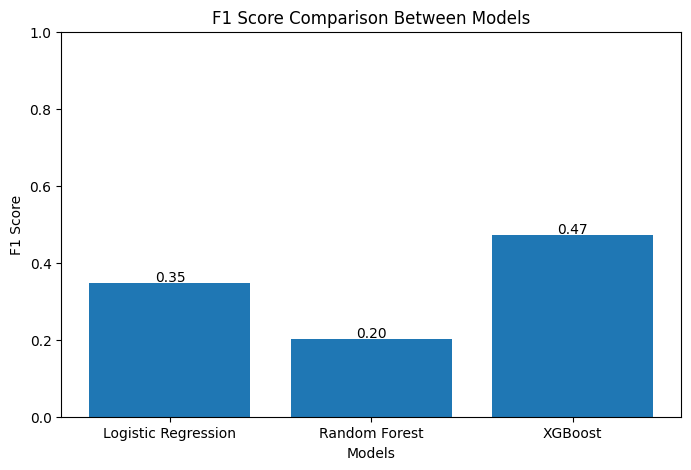

In [69]:
import matplotlib.pyplot as plt
evaluated_models = ['Logistic Regression', 'Random Forest', 'XGBoost']
f1_scores = [f1_log,f1_rfc,f1_xgb]


# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(evaluated_models, f1_scores)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison Between Models')

# Add the exact values on top of bars
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.005, f'{score:.2f}', ha='center', fontsize=10)

# Set y-axis range
plt.ylim(0, 1)

# Show the plot
plt.show()
